In [1]:
tx_id = 'NM_001032386.2'
protein_id = 'NP_001027558.1'

In [2]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVTranscriptCoordinateService

txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(tx_id)

/Users/robin/PycharmProjects/genophenocorr/gpc_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Response.transcripts has 6!=1 items. Choosing the first


In [ ]:
from gpsea.preprocessing import UniprotProteinMetadataService

pms = UniprotProteinMetadataService()

protein_metas = pms.annotate(protein_id)

assert len(protein_metas) == 1
protein_meta = protein_metas[0]

In [5]:
import hpotk
import os
from gpsea.preprocessing import load_phenopacket_folder
from gpsea.preprocessing import configure_caching_cohort_creator
from hpotk.validate import ValidationRunner
from hpotk.validate import ObsoleteTermIdsValidator, PhenotypicAbnormalityValidator, AnnotationPropagationValidator

fpath_hpo = 'https://github.com/obophenotype/human-phenotype-ontology/releases/download/v2023-10-09/hp.json'
hpo = hpotk.load_minimal_ontology(fpath_hpo)

validation_runner = ValidationRunner(
    validators=(
        ObsoleteTermIdsValidator(hpo),
        PhenotypicAbnormalityValidator(hpo),
        AnnotationPropagationValidator(hpo)
    ))

pc = configure_caching_cohort_creator(hpo, validation_runner=validation_runner)

fpath_suox_cohort = os.path.join(os.getcwd(), os.pardir, 'notebooks', 'SUOX', 'phenopackets')
cohort = load_phenopacket_folder(fpath_suox_cohort, pc)
f'Loaded {len(cohort)} samples'

Patients Created: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [01:58<00:00,  3.38s/it]
Validated under none policy
Showing errors and warnings
35 phenopacket(s) found at `/Users/robin/PycharmProjects/genophenocorr/dev/../notebooks/SUOX/phenopackets`
  patient #0
    phenotype-features
     warnings:
     ·No diseases found.
  patient #1
    phenotype-features
     warnings:
     ·No diseases found.
  patient #2
    phenotype-features
     warnings:
     ·No diseases found.
  patient #3
    phenotype-features
     warnings:
     ·No diseases found.
  patient #4
    phenotype-features
     warnings:
     ·No diseases found.
  patient #5
    phenotype-features
     warnings:
     ·No diseases found.
  patient #6
    phenotype-features
     warnings:
     ·No diseases found.
  patient #7
    phenotype-features
     warnings:
     ·No diseases found.
  patient #8
    phenotype-features
     warnings:
     ·No diseases

'Loaded 35 samples'

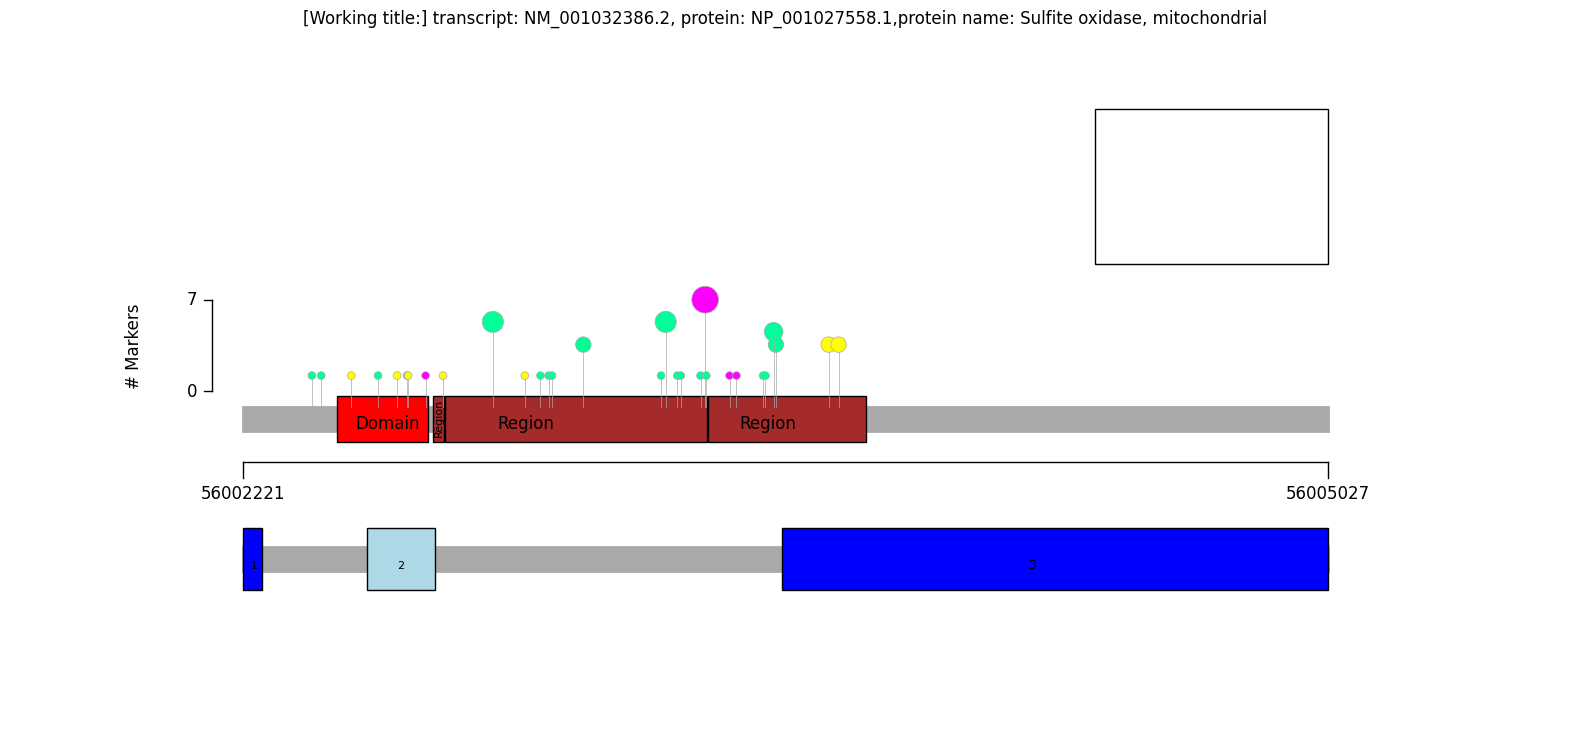

In [6]:
from gpsea.view._draw_variants import VariantsVisualizer
viz = VariantsVisualizer()
viz.draw_fig(tx_coordinates, protein_meta, cohort)